In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import pymc.sampling_jax
import arviz as az
from sklearn.preprocessing import scale
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
divorce = pd.read_csv("../data/WaffleDivorce.csv", sep=";")
divorce.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


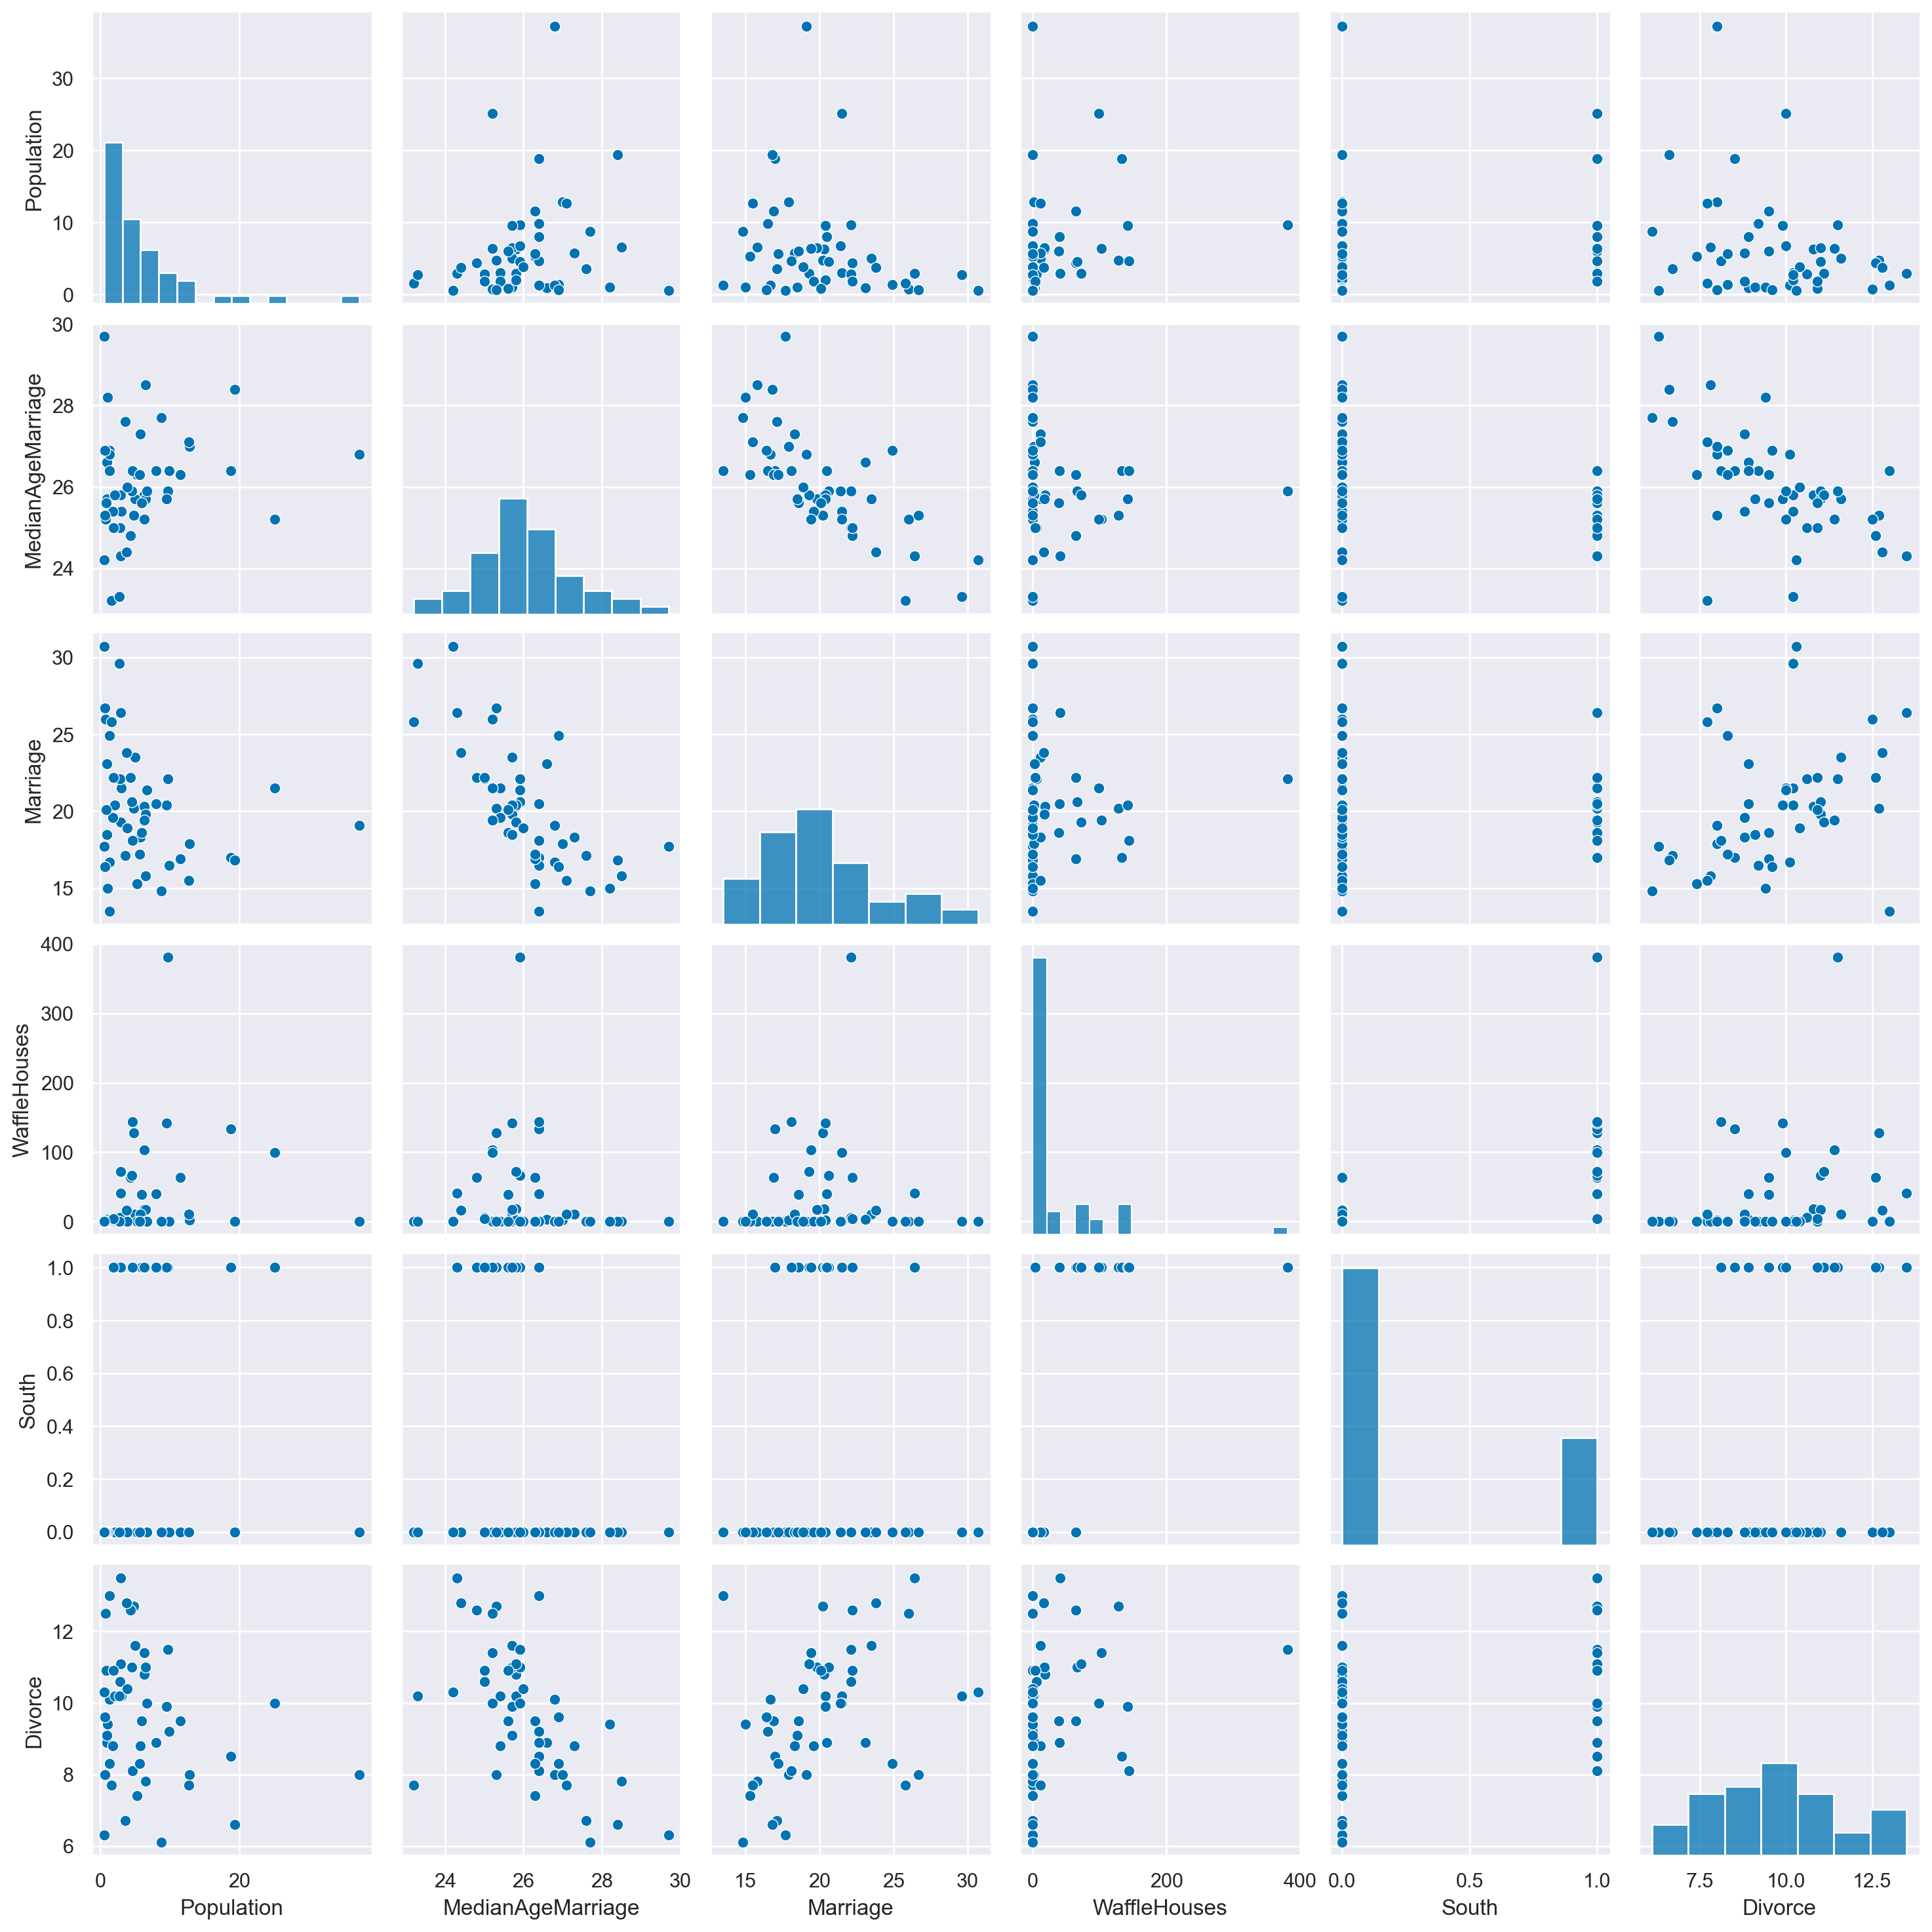

In [4]:
vars = [
    "Population",
    "MedianAgeMarriage",
    "Marriage",
    "WaffleHouses",
    "South",
    "Divorce",
]
sns.pairplot(divorce, x_vars=vars, y_vars=vars);

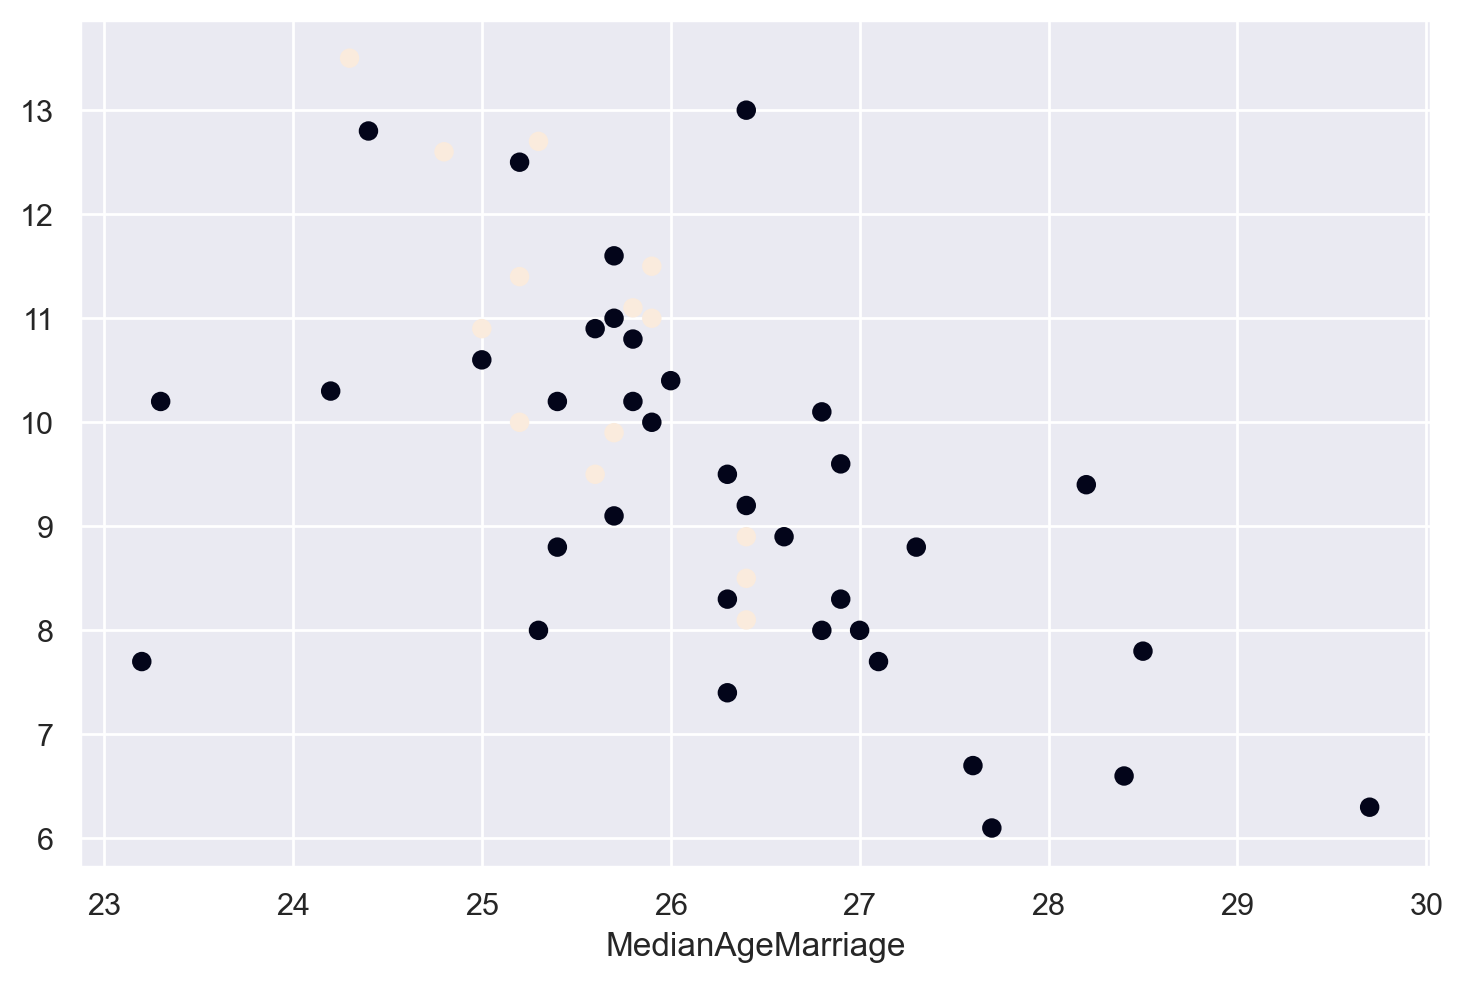

In [5]:
plt.scatter(divorce["MedianAgeMarriage"], divorce["Divorce"], c=divorce["South"])
plt.xlabel("MedianAgeMarriage")
plt.show()

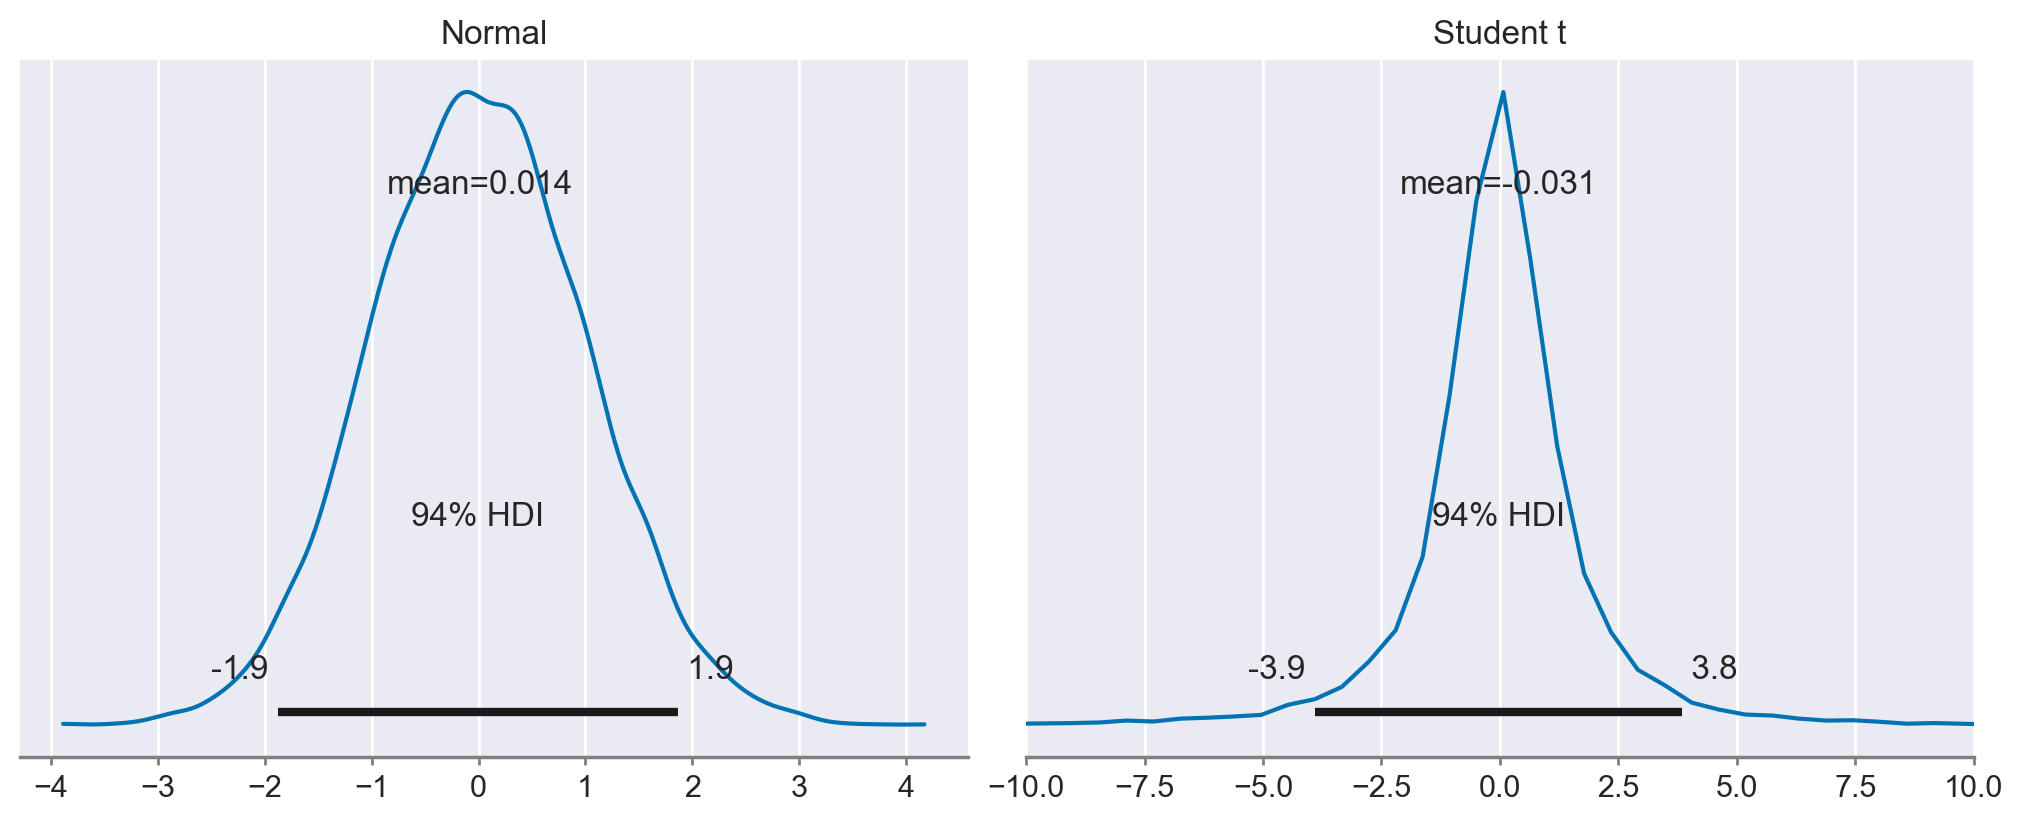

In [6]:
az.plot_posterior(
    {
        "Normal": np.random.normal(size=10000),
        "Student t": np.random.standard_t(df=2, size=10000),
    },
    figsize=(10, 4)
)
plt.xlim(-10, 10);

In [7]:
A = scale(divorce["MedianAgeMarriage"])
D = scale(divorce["Divorce"]) # tasso di divorzio
M = scale(divorce["Marriage"]) # tasso di matrimonio

In [8]:
with pm.Model() as n_model:
    sigma = pm.Exponential("sigma", 1)
    bA = pm.Normal("bA", 0, 0.5)
    bM = pm.Normal("bM", 0, 0.5)
    a = pm.Normal("a", 0, 0.5)

    mu = a + bM * M + bA * A
    Dmod = pm.Normal("D", mu, sigma, observed=D)
    
    n_sample = pm.sampling_jax.sample_numpyro_nuts(idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.511481


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 846.23it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 846.76it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 847.49it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 848.07it/s]


Sampling time = 0:00:02.709142


Transforming variables...


Transformation time = 0:00:00.113924


Computing Log Likelihood...


Log Likelihood time = 0:00:00.205718


In [9]:
with pm.Model() as t_model:
    sigma = pm.Exponential("sigma", 1)
    bA = pm.Normal("bA", 0, 0.5)
    bM = pm.Normal("bM", 0, 0.5)
    a = pm.Normal("a", 0, 0.5)

    mu = a + bM * M + bA * A
    Dmod = pm.StudentT("D", mu=mu, sigma=sigma, nu=2, observed=D)

    t_sample = pm.sampling_jax.sample_numpyro_nuts(idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.268619


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 837.45it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 837.88it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 838.47it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 839.02it/s]


Sampling time = 0:00:02.537660


Transforming variables...


Transformation time = 0:00:00.070943


Computing Log Likelihood...


Log Likelihood time = 0:00:00.272337


In [10]:
az.summary(n_sample)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bA,-0.611,0.159,-0.904,-0.307,0.003,0.002,3142.0,2836.0,1.0
bM,-0.065,0.159,-0.375,0.223,0.003,0.002,3106.0,2612.0,1.0
a,0.001,0.114,-0.195,0.233,0.002,0.002,3608.0,2635.0,1.0
sigma,0.836,0.088,0.677,1.001,0.002,0.001,3397.0,2197.0,1.0


In [11]:
az.summary(t_sample)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bA,-0.701,0.147,-0.985,-0.438,0.003,0.002,3039.0,2734.0,1.0
bM,0.046,0.204,-0.316,0.441,0.004,0.003,3028.0,2832.0,1.0
a,0.029,0.116,-0.186,0.244,0.002,0.002,3736.0,2462.0,1.0
sigma,0.588,0.090,0.420,0.752,0.002,0.001,3516.0,2661.0,1.0


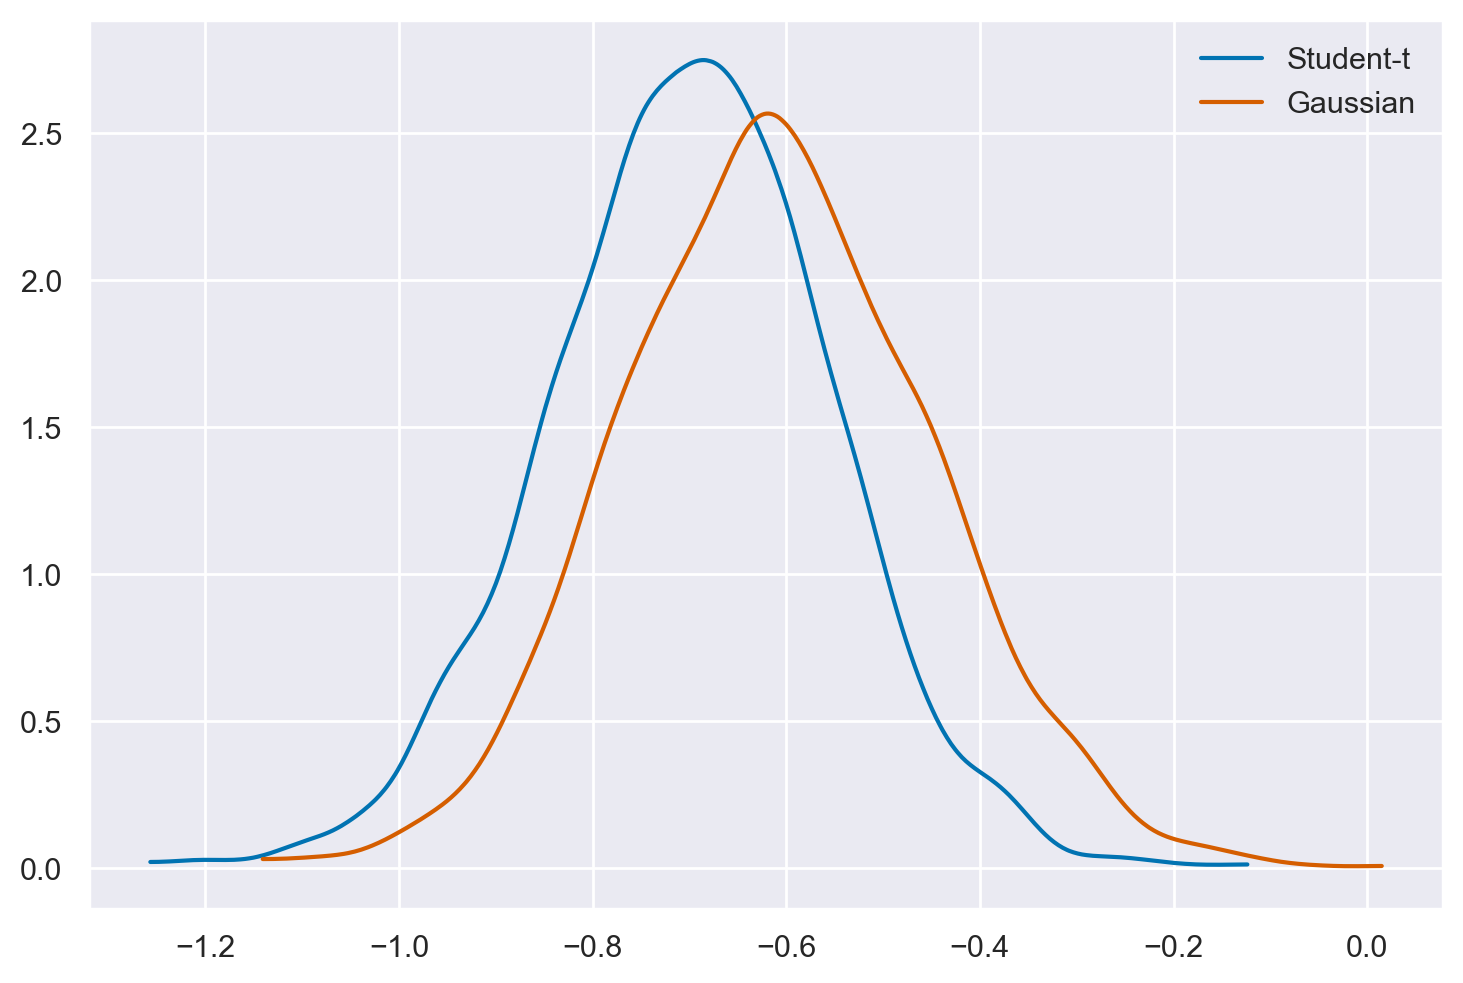

In [12]:
az.plot_dist(t_sample.posterior["bA"], color="C0", label="Student-t")
az.plot_dist(n_sample.posterior["bA"], color="C3", label="Gaussian");

In [13]:
az.loo(n_sample)

Computed from 4000 posterior samples and 50 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -64.48     6.39
p_loo        4.93        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       50  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [14]:
az.loo(t_sample)

Computed from 4000 posterior samples and 50 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -67.25     5.70
p_loo        6.54        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       50  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [15]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor

Last updated: Thu Jan 25 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pytensor: 2.18.4

pymc      : 5.10.3
numpy     : 1.26.2
arviz     : 0.17.0
pandas    : 2.1.4
matplotlib: 3.8.2
seaborn   : 0.13.0

Watermark: 2.4.3

